In [3]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [2]:
pip install tensorflow

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=02bca07b998d8678340dd65723fd640023cad207a452230879fb2fa600b4e971
  Stored in directory: c:\users\kalta\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for absl-py: filename=absl_py-0.9.0-py3-none-any.whl size=121935 sha256=6fee402a4b24ecc7cfc194b1d5ef188b25f7b5f5deac7103ceb33994a49351ac
  Stored in directory: c:\users\kalta\appdata\local\pip\cache\wheels\cc\af\1a\498a24d0730ef484019e007bb9e8cef3ac00311a672c049a3e
Successfully built termcolor absl-py


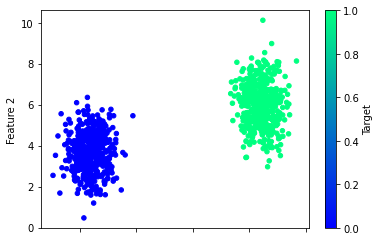

In [15]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [16]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [17]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [19]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [20]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [21]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8940 - accuracy: 0.1013
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8641 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8378 - accuracy: 0.0027
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8137 - accuracy: 0.0053
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7925 - accuracy: 0.0080
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7733 - accuracy: 0.0133
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7556 - accuracy: 0.0373
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7397 - accuracy: 0.0747
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7253 - accuracy: 0.1640
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7129 - accuracy: 0.2667
Epoch

Epoch 83/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 92/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5067


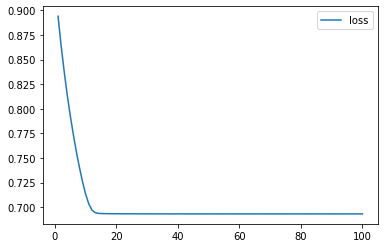

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

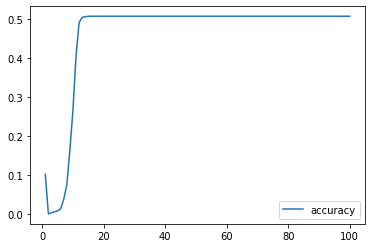

In [25]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6938 - accuracy: 0.4800
Loss: 0.6938242316246033, Accuracy: 0.47999998927116394


In [27]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

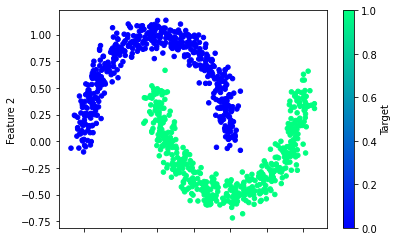

In [34]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [35]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [36]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5307
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 11/

24/24 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 83/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 84/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 85/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 86/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 87/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 90/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 92/100


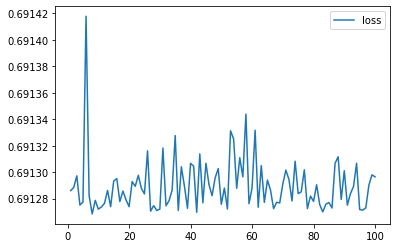

In [37]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

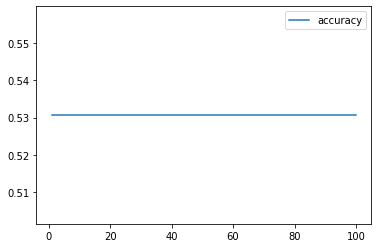

In [38]:
# Plot the loss
history_df.plot(y="accuracy")

In [39]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [40]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [41]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7666 - accuracy: 0.5480
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7208 - accuracy: 0.5880
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6760 - accuracy: 0.6613
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6350 - accuracy: 0.7227
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5950 - accuracy: 0.7747
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5572 - accuracy: 0.7893
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.7960
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4893 - accuracy: 0.8147
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4596 - accuracy: 0.8200
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4326 - accuracy: 0.8267
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.2484 - accuracy: 0.8960
Epoch 83/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2484 - accuracy: 0.8973
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2483 - accuracy: 0.8987
Epoch 85/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2482 - accuracy: 0.8960
Epoch 86/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2482 - accuracy: 0.8960
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2482 - accuracy: 0.8960
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2484 - accuracy: 0.8960
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2480 - accuracy: 0.8960
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2480 - accuracy: 0.8960
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2480 - accuracy: 0.8960
Epoch 92/100
